# IPython notebook in Dr. H's class

### Statistical distribution

In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


- Write a function that generates random coin flips, storing a value of 0 and +1 to correspond to heads and tails.

- Then, write a loop to flip this X time (ie x = 1, 10, 100) and see what our average score (total number of heads - total number tails) is!

In [119]:
import random

def fair_coin():
    return random.choice([0,1])

Test it out

In [120]:
def multi_trial(flips, flip_function):
    total = 0
    for i in range(FLIPS):
        total += flip_function()   
    return total

In [121]:
FLIPS = 10 #How many flips to do

multi_trial(FLIPS, fair_coin)
print 'Total score is: %s out of %s flips for "%s"' % (total, FLIPS, 'fair_coin')

Total score is: -2 out of 10 flips for "fair_coin"


What is a score that is out of the ordinary for 10 flips?  IE we expect on average, to get 0; however, we know that we won't always get 0.   We don't know the statistical distribution?  Let's test this for 1000 simulations of 10 flips. 

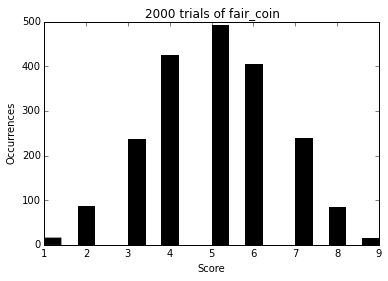

In [122]:
def simulation(trials=5, fcn=fair_coin, plot=True):
    ''' Run a function TRIALS times, plot the results in a histogram '''
    total = []
    for i in range(trials):
        total.append(multi_trial(FLIPS, fcn))

    if plot:
        plt.hist(total, bins=20, color='black')
        plt.title('%s trials of %s' % (trials, fcn.__name__))
        plt.xlabel('Score')
        plt.ylabel('Occurrences')
              
simulation(2000) 

Is this the binomial distribution?

In [123]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/math/d0e9bf22b11bd63cac4e02feb23f7c40e2c26943.png')

We can use Numpy's [binomial distribution generator to check!](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html).  

In [124]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...)
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a Binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    Parameters
    ----------
    n : float (but truncated to an integer)
            parameter, >= 0.
    p : float
            parameter, >= 0 and <=1.
    size : {tuple, int}
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.
    
    Returns
    -------
    samples : {ndarray, scalar}
              where the values are all integers in  [0, n].
    
    See Also
    --------
    scipy.stats.distributions.binom : probability density function,
        distribution or cumulative density function, etc.
    
    Notes
    -----
    The p

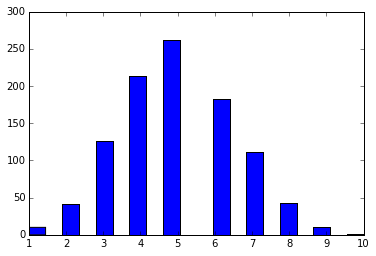

In [125]:
n, p = 10, .5 # number of trials, probability of each trial
s = np.random.binomial(n, p, size=1000) # result of flipping a coin 10 times, tested 1000 times.
plt.hist(s, bins=20);

The variance of a binomial distribution follows the following formula:

$V(X) = np(1-p)$

Where n is the number of trials/flips.  The distribution is N, ie this was done thousands of times to get a real statistical distribution.

Meaning the standard deviation is:

$\sigma(x) = \sqrt{V(x)}$

$\sigma(x) = \sqrt{np(1-p)}$

For a fair coin:

$\sigma(x) = \sqrt{n} \times 0.25$

In [126]:
print 'std is %s' %(np.std(s))
print 'sqrt n times .25 is',sqrt(10.0 * 0.25)

std is 1.56288163339
sqrt n times .25 is 1.58113883008


**By the way, how fast this this?**

In [127]:
%%timeit
s = np.random.binomial(n, p, size=1000) # result of flipping a coin 10 times, tested 1000 times.

10000 loops, best of 3: 96.1 µs per loop


In [128]:
%%timeit
simulation(2000, plot=False) 

10 loops, best of 3: 28.3 ms per loop


### What about two coins

What about two coins?

In [142]:
import os.path as op
from IPython.display import display, HTML

def load_style(s, figsize=None, loghide=False):
    """Load a CSS stylesheet in the notebook either by builtin styles, or
    from a file, or from a URL.
    Examples::
        %load_style 
        %load_style mystyle.css
        %load_style http://ipynbstyles.com/otherstyle.css
    """
    if s.startswith('http'):
        try:
            import requests
        except ImportError:
            raise ImportError('Failed to import python "requests" library;'
                              'please install to use load_style(url)')
        r =requests.get(s)
        style = r.text

    else:
        try:
            with open(s, 'r') as f:
                style = f.read()
        except IOError:
            raise IOError('Failed to load style as a url, file or builtin type.'
               ' Valid builtins are "%s"' % '","'.join(__all__.keys() ))

    out = '<style>\n{style}\n</style>'.format(style=style)
    
    if figsize:
        if figsize == True:
            figsize = 8, 5.5
        else:
            try:
                fx, fy = figsize
            except Exception:
                fx, fy = figsize, figsize
            
        fstring = "\ninput:pylab.rcParams['figure.figsize'] = %s, %s\n" \
            % (fx,fy)
        out += fstring

    display(HTML(out))
    
    if loghide:
        import warnings #supress non-pyuvvis log msgs
        warnings.filterwarnings('ignore')      


In [145]:
#load_style('https://raw.githubusercontent.com/panditarevolution/ipythonNotebook_customs/master/monokai/custom.css')
load_style('https://raw.githubusercontent.com/hugadams/pyuvvis/master/pyuvvis/bundled/gwu.css')